# Assignment 3
Kyle Ziegler, 11/2021

***
## Visualization Technique
**Distribution plots and histograms**

- I chose these distribution plots and histograms, along with hues and density to demonstrate trends in the two datasets. I enjoyed getting to plot a different type of graph and playing around with the parameters - such as bins and normalization techniques - in order to convey the message clearly. 

- When using a distribution plot, you can chose either an X or an X and Y, which will change how the graph looks. When specifying a Y, you'll notice that the chart will look like a topographical map where distance between lines shows density. I chose to just specify X in my charting, that allows the viewer to focus on the segments (noted by differen colors), and what percentage of that slice the segments make up.

- In general these plots are a great start to getting insight into your data - is it skewed in one direction? What is the data range? What does the distribution look like? Do these findings look different for other variables?  

- For an alternative, you can also use a bar format - which is the last chart I show. It does an okay job of showing the data distribution, but I believe that the KDE does a better job at conveying trends in the same data.

***
## Visualization Library
**Seaborn**
- I went with Seaborn for charting data in this project due to its populatity, effectiveness of heatmap and density charts, and API simplicity. Aside from matplotplib, I wanted to learn a few other APIs or libraries that are common for visualizing data in python notebooks, many websites rank Seaborn as one of the most popular. Density and different hues were great mechanisms that I wanted to use to show relationships in my data, and Seaborn had many charts that were aesthetically pleasing. I believe that there are many options in this space that could accomplish the same result, I feel that it comes down to a preference, as well as industry direction (you could be good at using a certain lib, but no one uses it and it's unsupported, etc).

- The library is [open source](https://github.com/mwaskom/seaborn) and was created by Michael Waskom. Latest commit was a few days ago, and has been contributed to regularly since 2012 when it was first released.

- This library is declarative, is integrated with matplotlib and displays results in jupyter lab.

**Installing Seaborn**
- Use ```pip install seaborn```

**Intalling the rest of the libs**

```pip install pandas``` <br>
```pip install matplotlib```<br>
```pip install numpy```<br>

In [3]:
# Import libraries we'll use throughout the demonstrations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mat

# Demonstrations

In this section I'll show you 4 graphs on 2 datasets - the first being Netflix titles, and the second is a collection of wine lab and sommelier testings.


****
## 1) Movie Ratings Over Time, Density Histogram

### Instructions
1. [Download](https://www.kaggle.com/shivamb/netflix-shows) dataset - Netflix titles (Kaggle, 2020)
2. Import Seaborn and Matplotlib
3. Replicate charting techniques and data queries demonstrated below. Note the filtering I do on the asset type and release year.

### Analysis
- I choose a distribution plot with density to get an idea of Netflix title release and ratings since 2005.
- We see that there is a clear trend in the increase of TV-MA ratings starting at 2016 and increases steadily through 2020. Notice how the density of PG-13 and PG are staying relatively constant year over year.
- The density provides great insight into rating distribution each year, and allows us to compare that to other years across all ratings. I have narrowed the years due to the fact that there are significantly more titles that are newer than 2005 on Netflix, and this is where we can focus on the drastic change in TV-MA movies being release in the last 5 years.
- I added a second distribution plot to show a different view of the concentration of TV-MA and TV-14 ratings. I believe that this one quantifies the trend in a better way - through count on the y axis vs a differnce in hue, but they both show the same message. Notice how TV-MA movies make up mearly 50% of the total releases in 2017-2018.
- Questions I pose: do movies contain more graphic and mature content than years past? Or has the standard for TV-MA or TV-14 ratings changed? Does Netflix focus on TV-MA and TV-14 titles in recent years? There are many possible factors that could be affecting this, but it is clear from the data that there is a trend more mature show ratings being released in the last 5 years.



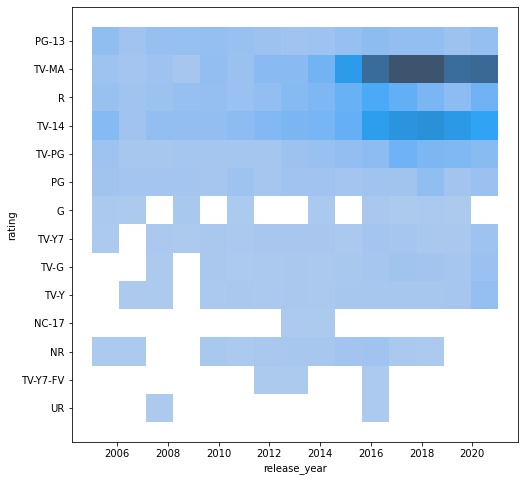

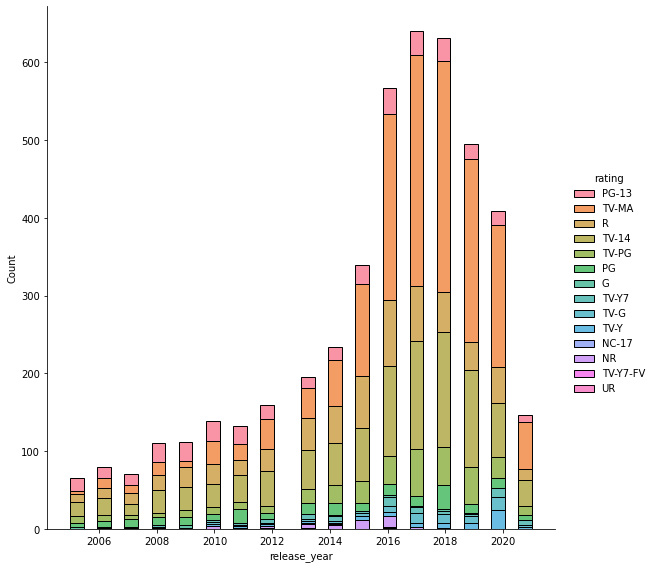

In [4]:
# Movie ratings over time, density histogram
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.dropna(inplace=True)

plt.subplots(figsize=(8, 8))

query = netflix_df[(netflix_df["type"] == "Movie") & (netflix_df["release_year"] >= 2005)]

sns.histplot(
    data=query, 
    x="release_year", 
    y="rating",
    bins=15,
    fill=True,
    stat="density", 
    hue_norm=mat.colors.Normalize
)

sns.displot(data=query, 
    x="release_year",hue="rating",height=8, multiple="stack")

# movies = query.groupby(["release_year","rating"])["release_year","rating","title"]
# print(movies)

## 2) Wine Quality and Alcohol Content, an Exploratory Analysis
### Instructions
1. [Download](https://www.kaggle.com/ruthgn/wine-quality-data-set-red-white-wine) data set from Kaggle, and save as a CSV on your machine.
- Optional - Install the Kaggle SDK and use your terminal to download.
2. Import matplotlib and seaborn
3. Use the same params and plotting techniques I have used here, or explore the dataset on your own.

### Analysis
- My objective was to find a correlation between various measurments and wine quality - rated on a scale of 3-9. I do this through distribution plotting techniques including KDE (first chart), and a histogram (second chart). Examining this we notice that as alcohol content increases from 9% to 14%, there are much stronger ratings until it quickly drops off around 14%. My thoughts here are that quality is correlated positively with alcohol content within this range, and that sommeliers prefer wine around 14% the most. 
- I believe that the KDE (Kernel density estimation) view shows us the density and quality scores for varying levels of alcohol.
- The second chart showing counnts for different alcohol volumes in 15 buckets, is good for showing us the amount and distribution of ratings. This then helped me craft a query for narrowing the range of alcohol we should look at, since there are few values on the extremes.
- Questions after my initial anlysis: what could be causing this connection between wine quality and alcohol content? Is it actually due to the fact that sommeliers prefer higher alcohol content, or were there more lenient sommeliers in the judging of high alcohol content wines? There is much we do not know at this point, but this initial evaluation gives us a few hypothesis to look into.

In [5]:
# Data preview

wine_df = pd.read_csv('wine.csv')
wine_df[["type","quality","alcohol"]]

,type,quality,alcohol
0,white,6,8.8
1,white,6,9.5
2,white,6,10.1
3,white,6,9.9
4,white,6,9.9
...,...,...,...
6492,red,5,10.5
6493,red,6,11.2
6494,red,6,11.0
6495,red,5,10.2


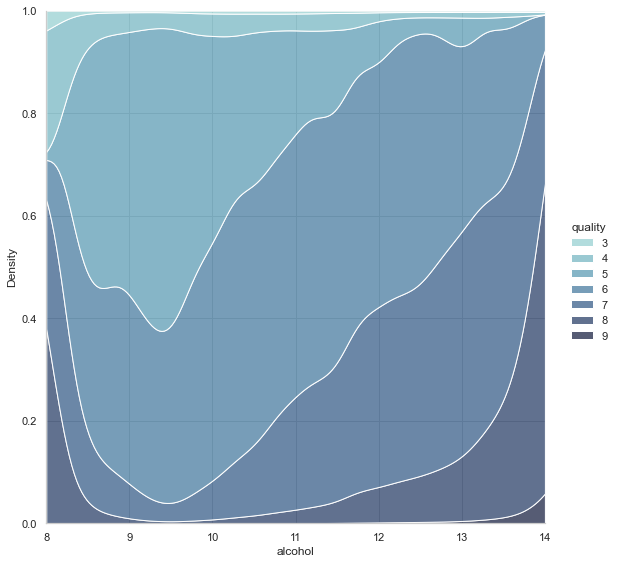

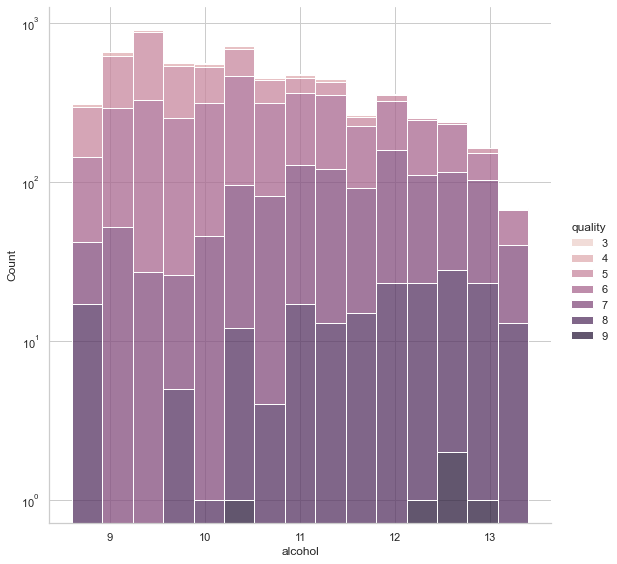

In [6]:
query = wine_df[(8.5 < wine_df["alcohol"] ) & (wine_df["alcohol"] < 13.5)]

sns.set_theme(style="whitegrid")

sns.displot(
    data=query,
    x="alcohol", hue="quality",
    kind="kde", height=8,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

sns.displot(data=query, x="alcohol", hue="quality", kind="hist", multiple="stack", height=8, log_scale=(False, True),bins=15)